In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = r"D:\桌面\CSE_student_performances.csv"
data = pd.read_csv(file_path)

#展示数据规模
print(data.shape)

(99, 10)


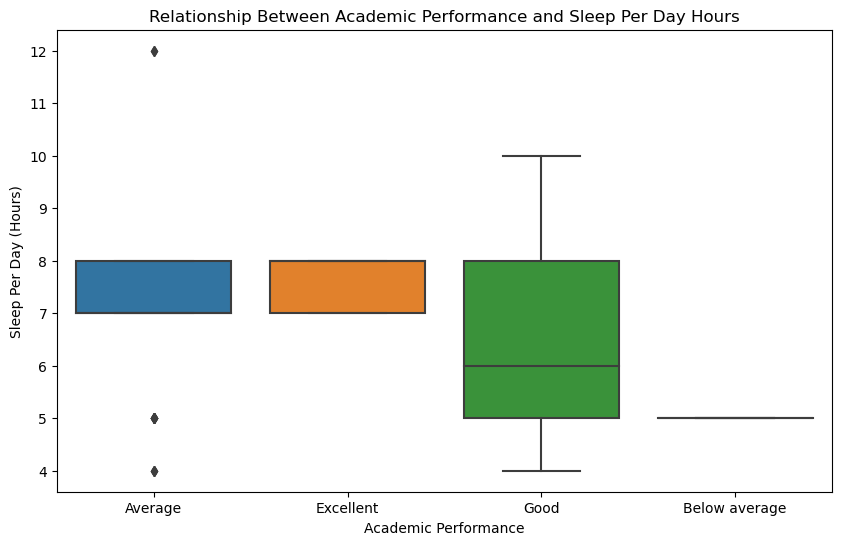

In [9]:
# 学业表现与每日睡眠时长之间关系的箱形图
plt.figure(figsize=(10, 6))
sns.boxplot(x='AcademicPerformance', y='SleepPerDayHours', data=data)
plt.title('Relationship Between Academic Performance and Sleep Per Day Hours')
plt.xlabel('Academic Performance')
plt.ylabel('Sleep Per Day (Hours)')
plt.show()

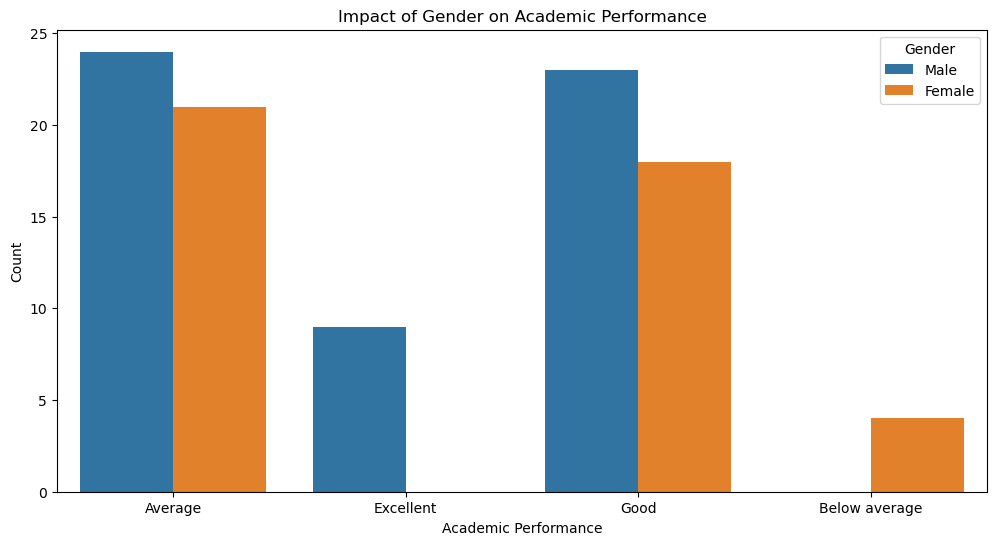

In [11]:
# 性别对于学习情况影响的条形图
plt.figure(figsize=(12, 6))
sns.countplot(x='AcademicPerformance', hue='Gender', data=data)
plt.title('Impact of Gender on Academic Performance')
plt.xlabel('Academic Performance')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

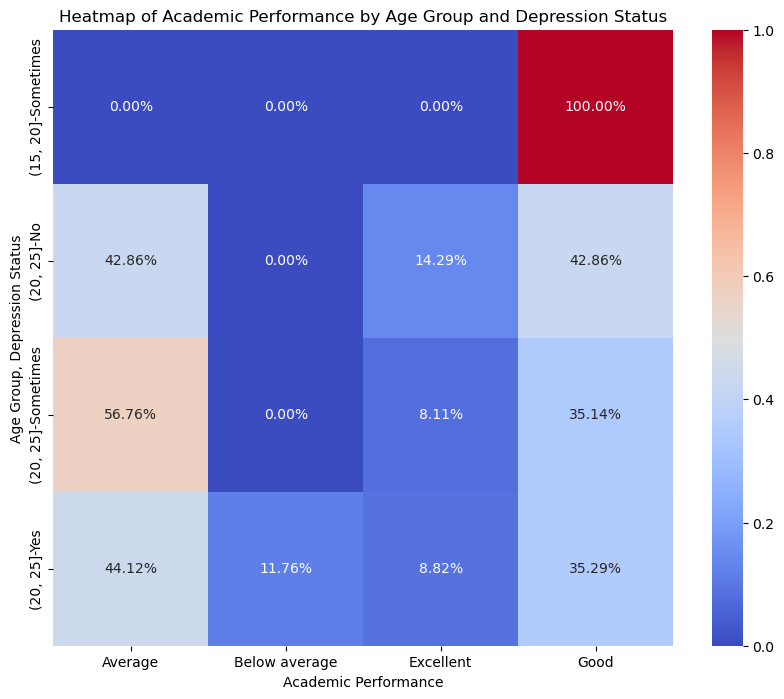

In [13]:
#展示年龄、抑郁状态与学习情况关系的热力图
# 修正年龄列名（移除末尾空格）
data.rename(columns={'Age ': 'Age'}, inplace=True)

# 重新分组年龄
age_bins = [15, 20, 25, 30, 35, 40]  # 根据数据范围调整分组
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins)

# 创建包含年龄分组、抑郁状态和学业表现的交叉表
heatmap_data = pd.crosstab(index=[data['AgeGroup'], data['DepressionStatus']], 
                           columns=data['AcademicPerformance'], 
                           normalize='index')  # 使用百分比

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2%")
plt.title('Heatmap of Academic Performance by Age Group and Depression Status')
plt.ylabel('Age Group, Depression Status')
plt.xlabel('Academic Performance')
plt.show()

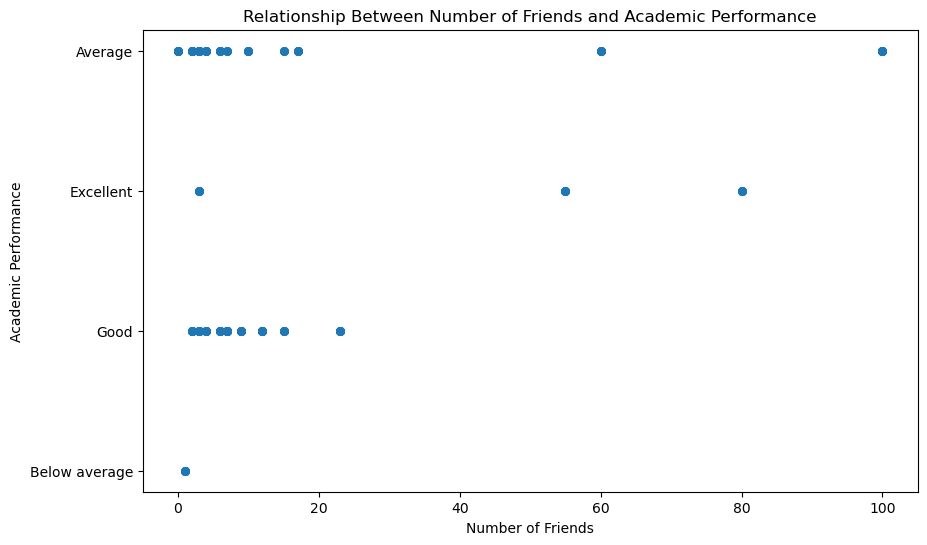

In [14]:
# 生成朋友数量与学业情况关系的散点图

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumberOfFriend', y='AcademicPerformance', data=data, edgecolor=None)
plt.title('Relationship Between Number of Friends and Academic Performance')
plt.xlabel('Number of Friends')
plt.ylabel('Academic Performance')
plt.show()

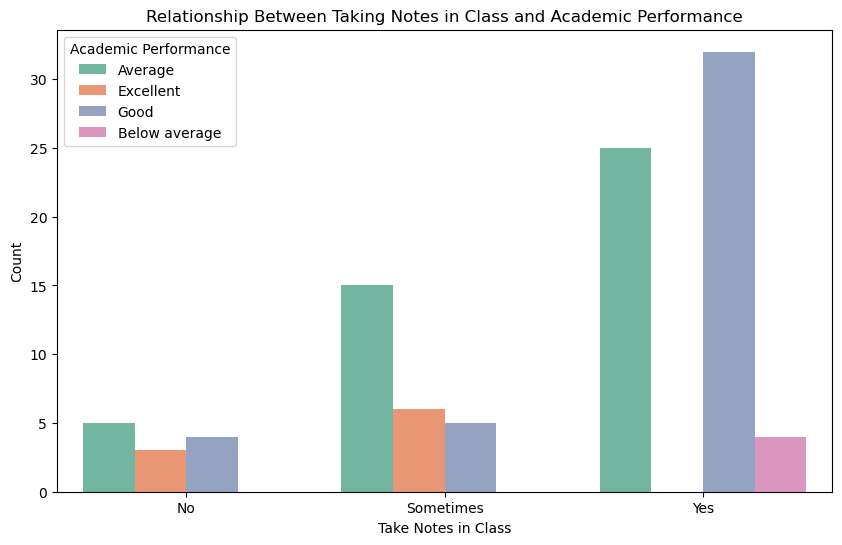

In [15]:
# 生成上课是否做笔记与学业表现关系的条形图

plt.figure(figsize=(10, 6))
sns.countplot(x='TakingNoteInClass', hue='AcademicPerformance', data=data, palette='Set2')
plt.title('Relationship Between Taking Notes in Class and Academic Performance')
plt.xlabel('Take Notes in Class')
plt.ylabel('Count')
plt.legend(title='Academic Performance')
plt.show()

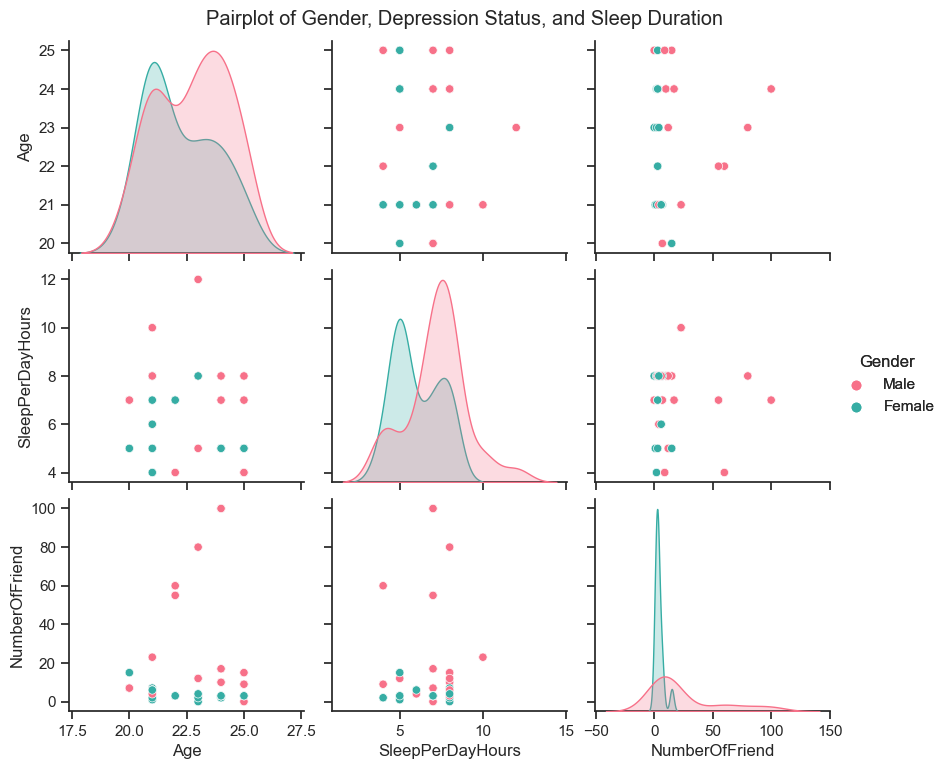

In [16]:
# 生成抑郁状态，性别，睡眠时长三者间的成对图

# 设置样式
sns.set(style="ticks")

# 禁用警告
import warnings
warnings.filterwarnings("ignore")

# 绘制成对图
pairplot = sns.pairplot(data, hue="Gender", diag_kind="kde", palette="husl")
pairplot.fig.suptitle("Pairplot of Gender, Depression Status, and Sleep Duration", y=1.02)
pairplot.add_legend()
plt.show()